In [46]:
import sys
sys.path.append('../src/')
from datasets_ import COCOCaptions
import matplotlib.pyplot as plt
import textwrap
import torch
from torchvision.transforms import v2 as transforms
from bpe_encoder import get_bpe_encoder

In [2]:
ds = COCOCaptions(
    data_path='../data',
    split='test',
    task="captioning",
    num_max_bpe_tokens=64,
    color_jitter=None,
    beit_transforms=False,
    crop_scale=(1.0, 1.0),
)

INFO:datasets_.base_datasets:[COCOCaptions]: Data already exists under: ../data/coco


In [3]:
ds.load()

INFO:datasets_.base_datasets:[COCOCaptions]: Load 25010 image-text pairs from ../data/coco/coco_captioning.test.jsonl. 


In [4]:
crop_scale = (0.08, 1.0)

In [5]:
transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.uint8, scale=True),
    transforms.RandomResizedCrop(
        size=(224, 224), scale=crop_scale, interpolation=3
    ),
    transforms.ToDtype(torch.float32, scale=True),
]) 

In [42]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
def plot_image_text_augmentations(reference_image_list, aug_image_list, row_labels):
    # Set the number of images per row and number of rows
    images_per_row = 6  # Increase the number of images per row by 1
    num_rows = 5

    # Create a figure and axes
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(18, 15))  # Increase the figure size

    # Add titles to each column
    axes[0, 0].set_title("Original")  # Title for the first column
    for j in range(1, images_per_row):
        axes[0, j].set_title(f"Example {j}")

    # Add text on the left side for each row
    wrapped_labels = [textwrap.fill(label, 15) for label in row_labels]  # Wrap the text

    for i, label in enumerate(wrapped_labels):
        axes[i, 0].text(-0.2, 0.5, label, transform=axes[i, 0].transAxes, va='center', ha='right')

    # Add a central title over the other 5 columns
    # fig.suptitle("Image Gallery", fontsize=16, y=0.92)


    # Iterate over the axes and plot the images
    for i in range(num_rows):
        axes[i, 0].imshow(reference_image_list[i].permute(1, 2, 0))
        axes[i, 0].axis('off')

        for j in range(1, images_per_row):  # Start from the second column
            axes[i, j].imshow(aug_image_list[i][j-1].permute(1, 2, 0))
            axes[i, j].axis('off')

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Show the plot
    plt.show()

In [7]:
encoder = get_bpe_encoder('../data')

In [36]:
reference_image_list = []
aug_image_list = []
row_labels = []
for i in [176, 14924, 9016, 12888, 20691]:
    reference_image_list.append(ds[i]['image'])
    aug_image_list.append([transform(ds[i]['image']) for _ in range(5)])
    row_labels.append(encoder.decode(ds[i]['text']))

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/timcares/miniconda3/envs/mmrl/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/timcares/miniconda3/envs/mmrl/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/timcares/miniconda3/envs/mmrl/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scal

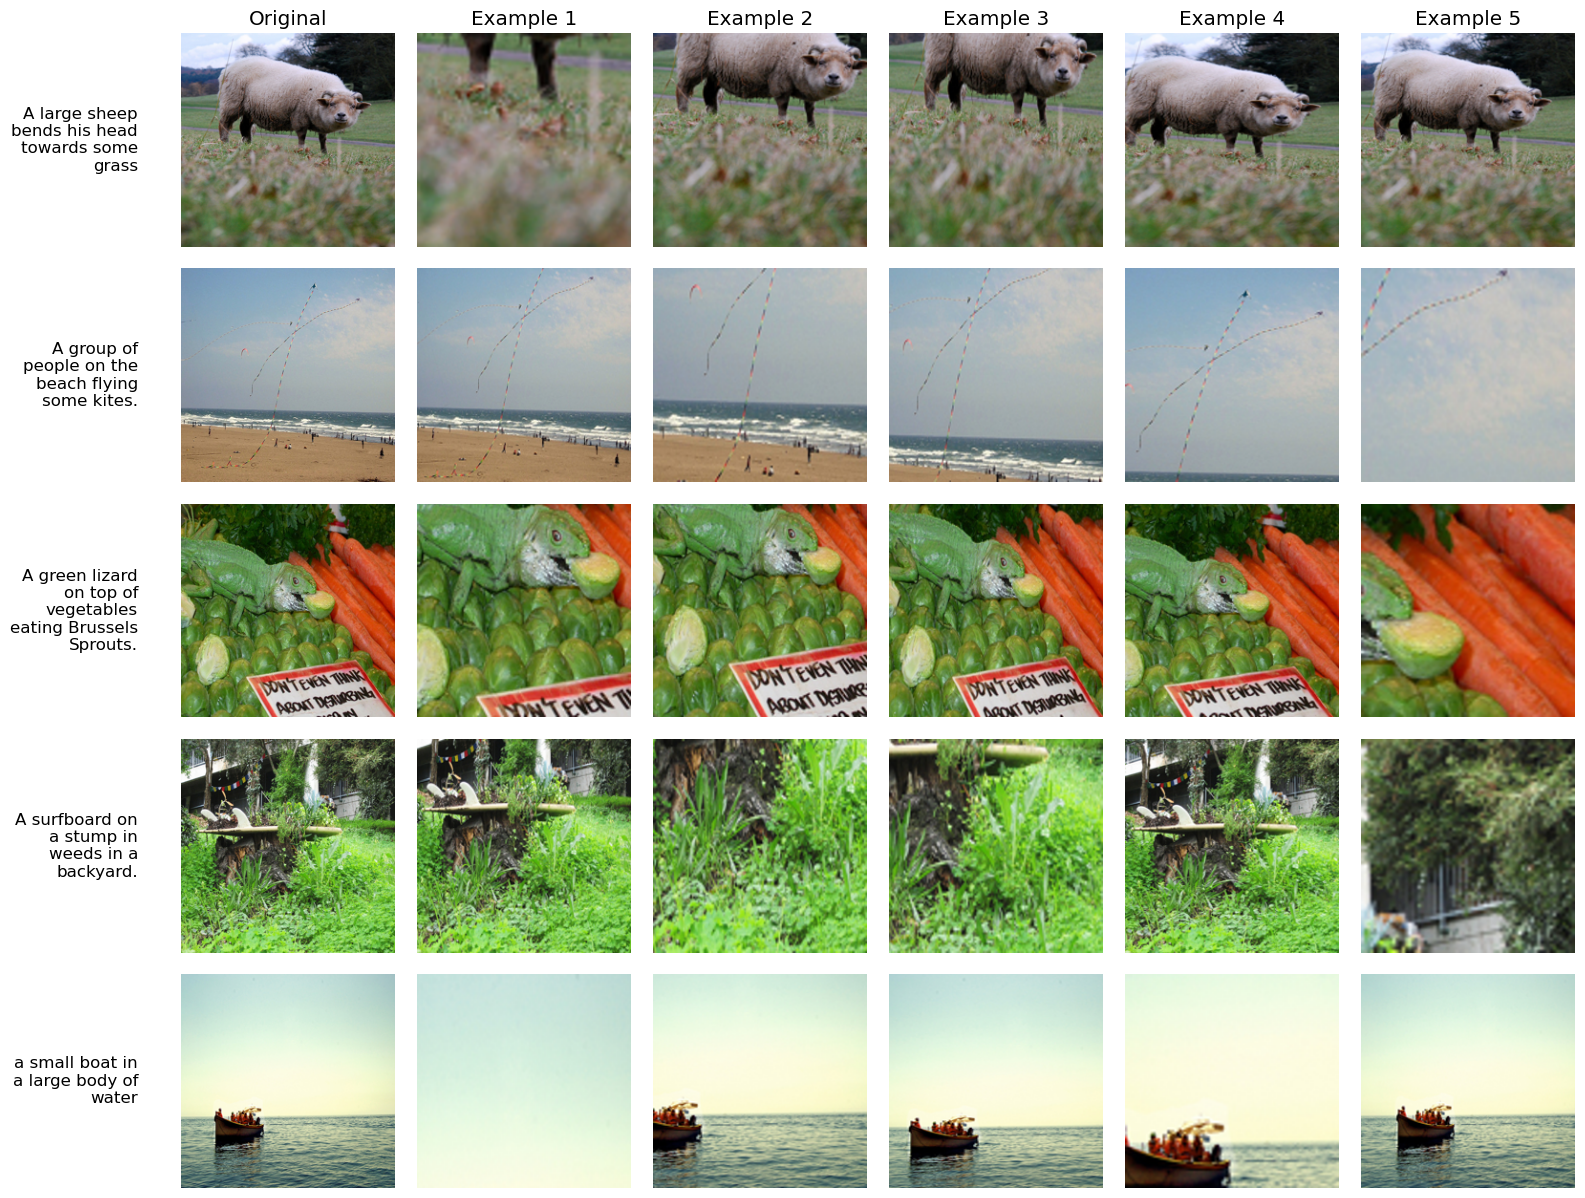

In [43]:
plot_image_text_augmentations(reference_image_list, aug_image_list, row_labels)

In [47]:
crop_scale = (0.6, 1.0)
transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.uint8, scale=True),
    transforms.RandomResizedCrop(
        size=(224, 224), scale=crop_scale, interpolation=3
    ),
    transforms.ToDtype(torch.float32, scale=True),
]) 

In [49]:
reference_image_list = []
aug_image_list = []
row_labels = []
for i in [176, 14924, 9016, 12888, 20691]:
    reference_image_list.append(ds[i]['image'])
    aug_image_list.append([transform(ds[i]['image']) for _ in range(5)])
    row_labels.append(encoder.decode(ds[i]['text']))

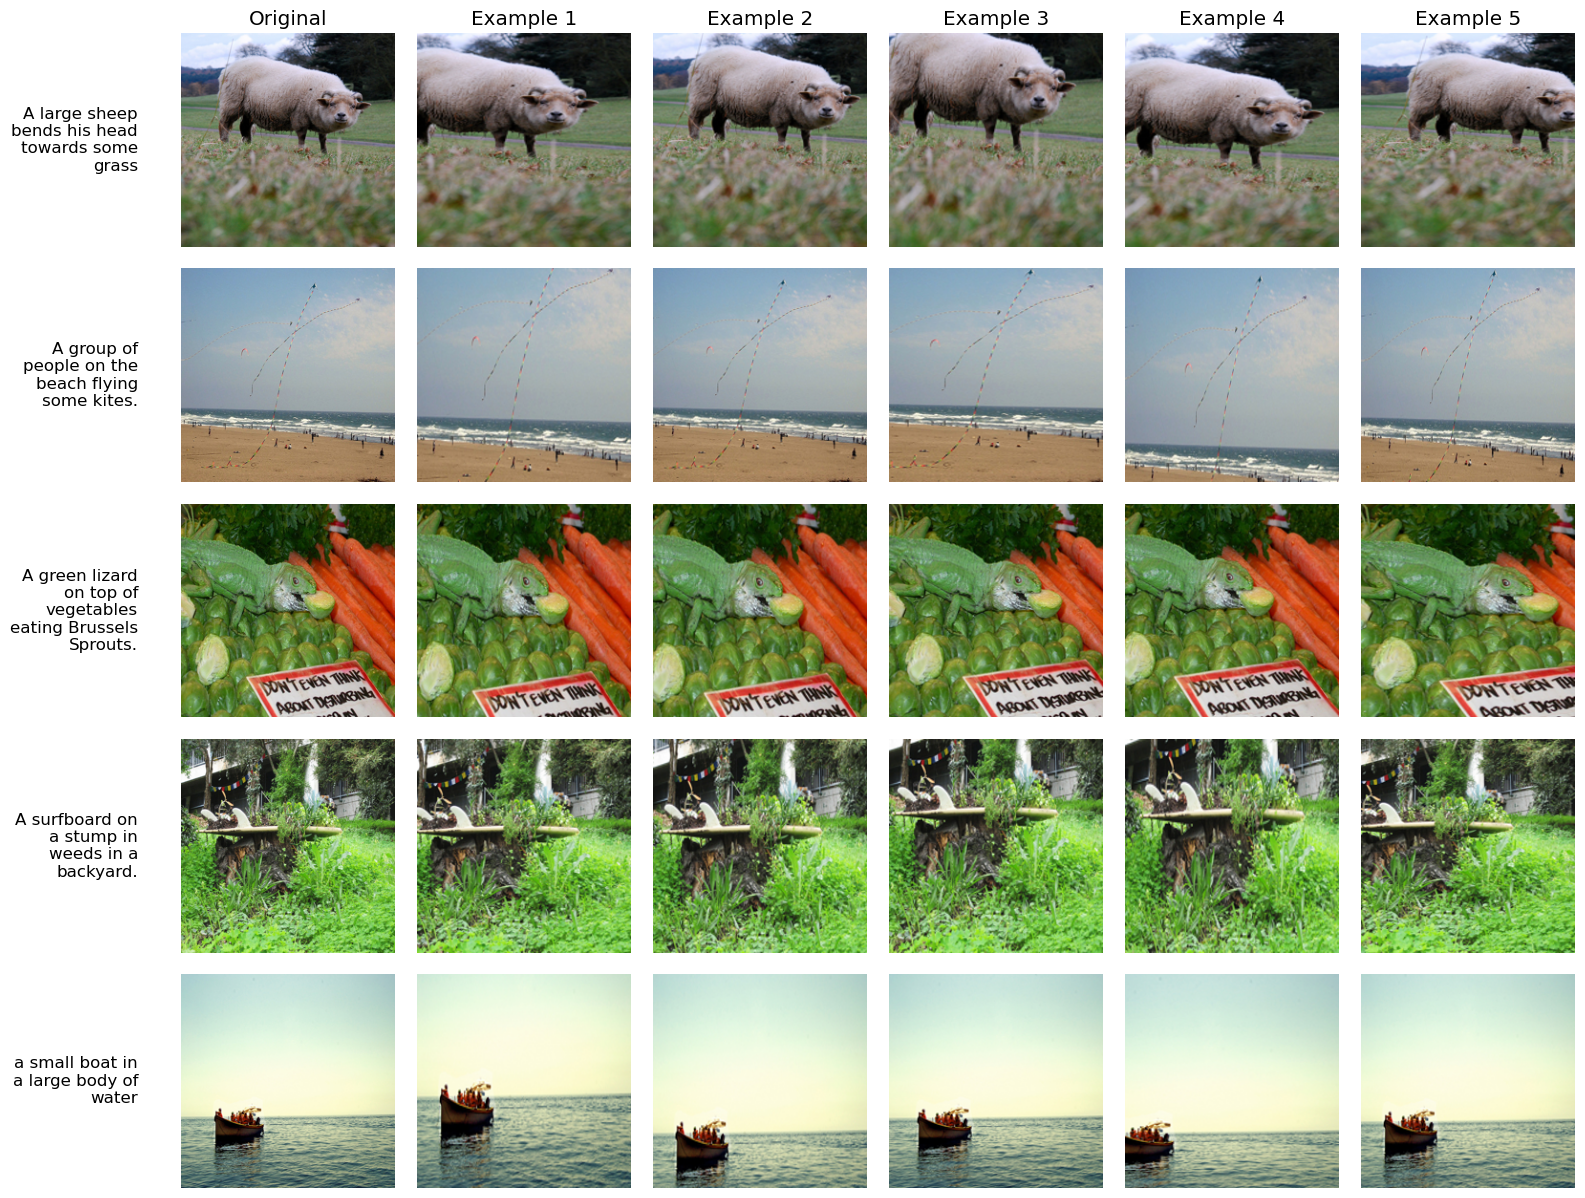

In [50]:
plot_image_text_augmentations(reference_image_list, aug_image_list, row_labels)